# 1장 선형방정식과 LU분해 (Linear Equations and LU Decomposition)

## 1.1 Common imports & utilities

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# SciPy (for the sparse-matrix demo; if missing, we’ll skip that section)
try:
    from scipy import sparse
    SCIPY_AVAILABLE = True
except Exception:
    SCIPY_AVAILABLE = False

# Reproducibility
np.random.seed(7)

# Pretty printing helpers
def section(title):
    print("\n" + "=" * 70)
    print(title)
    print("=" * 70)

def print_block(title, value):
    print(f"\n-- {title} --")
    print(value)

# 2D vector plot helper
def plot_vector_2d(v, axes=(0, 6, 0, 6), title="2D Vector"):
    plt.figure()
    plt.plot([0, v[0]], [0, v[1]], linewidth=2)
    plt.scatter([0, v[0]], [0, v[1]])
    plt.axis("square")
    plt.axis(axes)
    plt.grid(True)
    plt.title(title)
    plt.show()


## 1.2 Environment info

In [2]:
section("Environment")
print_block("NumPy version", np.__version__)
print_block("SciPy available (for sparse demo)", SCIPY_AVAILABLE)



Environment

-- NumPy version --
2.0.2

-- SciPy available (for sparse demo) --
True


## 1.3 Creating vectors


Creating Vectors


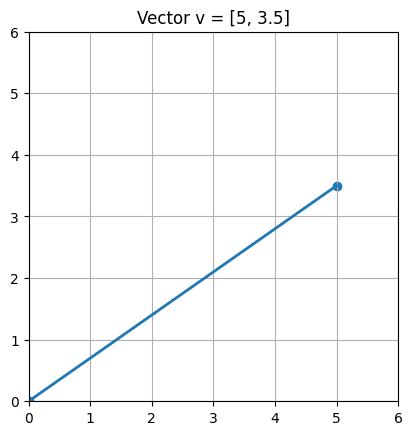


-- List --
[2, 4, 6, 8]

-- Array (np.ndarray) --
[2 4 6 8]

-- Row vector (1×4) --
[[2 4 6 8]]

-- Column vector (4×1) --
[[2]
 [4]
 [6]
 [8]]

-- v_row.T --
[[2]
 [4]
 [6]
 [8]]

-- v_array.T (no change for 1D) --
[2 4 6 8]

-- asarray(v_row) is v_row? --
True

-- array(v_row) is v_row? --
False

-- v_row.copy() is v_row? --
False


In [4]:
section("Creating Vectors")

# Create and plot a 2D vector
v = np.array([5.0, 3.5])
plot_vector_2d(v, axes=(0, 6, 0, 6), title="Vector v = [5, 3.5]")

# List vs. array
v_list = [2, 4, 6, 8]
v_array = np.array([2, 4, 6, 8])
print_block("List", v_list)
print_block("Array (np.ndarray)", v_array)

# Row/column vectors
v_row = np.array([[2, 4, 6, 8]])
v_col = np.array([[2], [4], [6], [8]])
print_block("Row vector (1×4)", v_row)
print_block("Column vector (4×1)", v_col)

# Transpose: 1D arrays don’t change shape on .T
print_block("v_row.T", v_row.T)
print_block("v_array.T (no change for 1D)", v_array.T)

# asarray / array / copy differences
new_row1 = np.asarray(v_row)
new_row2 = np.array(v_row)
new_row3 = v_row.copy()
print_block("asarray(v_row) is v_row?", new_row1 is v_row)
print_block("array(v_row) is v_row?", new_row2 is v_row)
print_block("v_row.copy() is v_row?", new_row3 is v_row)


## 1.4 Vector combinations/products (linear combination, dot, outer, norm, broadcasting)

In [5]:
section("Vector Operations")

v1 = np.array([3, -1, 2])
v2 = np.array([1, 4, -2])
v3 = np.array([0, 5, 5])
coeff = np.array([2, -1, 0.5])   # coefficients for a linear combination

# Linear combination
v_lin = coeff[0]*v1 + coeff[1]*v2 + coeff[2]*v3
print_block("Linear combination v_lin", v_lin)

# Slicing examples
print_block("v1[-1] (last element)", v1[-1])
print_block("v1[1:] (from 2nd to end)", v1[1:])
print_block("v1[:2] (first two)", v1[:2])

# Dot / outer / elementwise (Hadamard) product
v_dp = np.dot(v1, v2)
v_op = np.outer(v1, v2)
v_hadamard = v1 * v2
print_block("Dot product dot(v1, v2)", v_dp)
print_block("Outer product outer(v1, v2)", v_op)
print_block("Elementwise product v1 * v2", v_hadamard)

# Norm and unit vector
norm_v1 = np.linalg.norm(v1)
v1_unit = v1 / norm_v1
print_block("||v1||", norm_v1)
print_block("Unit vector v1_unit", v1_unit)

# Average via dot product
values = np.array([12, 15, -3, 9, 0, 6])
avg = np.dot(values, np.ones_like(values, dtype=float)) / len(values)
print_block("Average via dot product", avg)

# Simple broadcasting examples
base = np.array([10, 20, 30])
print_block("base + 100", base + 100)
print_block("base + [1, 2, 3]", base + np.array([1, 2, 3]))



1.2 Vector Operations

-- Linear combination v_lin --
[ 5.  -3.5  8.5]

-- v1[-1] (last element) --
2

-- v1[1:] (from 2nd to end) --
[-1  2]

-- v1[:2] (first two) --
[ 3 -1]

-- Dot product dot(v1, v2) --
-5

-- Outer product outer(v1, v2) --
[[ 3 12 -6]
 [-1 -4  2]
 [ 2  8 -4]]

-- Elementwise product v1 * v2 --
[ 3 -4 -4]

-- ||v1|| --
3.7416573867739413

-- Unit vector v1_unit --
[ 0.80178373 -0.26726124  0.53452248]

-- Average via dot product --
6.5

-- base + 100 --
[110 120 130]

-- base + [1, 2, 3] --
[11 22 33]


## 1.5 Building matrices (identity/zeros/ones/diagonal/concatenate/triangular parts)

In [7]:
section("Building Matrices")

I = np.eye(4)
Z = np.zeros((4, 4))
O = np.ones((4, 4))
D = np.diag([2, -3, 5, 1])  # diagonal matrix
print_block("Identity I(4)", I)
print_block("Zeros Z", Z)
print_block("Ones O", O)
print_block("Diagonal D", D)

# Extract diagonal from a random matrix
R = np.random.randn(4, 5)
print_block("np.diag(R) (diagonal entries)", np.diag(R))

# Concatenate two matrices along columns
A = np.random.randn(4, 4)
B = np.random.randn(4, 3)
AB = np.concatenate((A, B), axis=1)
print_block("A (4×4)", A)
print_block("B (4×3)", B)
print_block("Column concatenation [A | B] (4×7)", AB)

# Lower/upper triangular parts
LT = np.tril(A)
UT = np.triu(A)
print_block("Lower triangular np.tril(A)", LT)
print_block("Upper triangular np.triu(A)", UT)



Building Matrices

-- Identity I(4) --
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

-- Zeros Z --
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

-- Ones O --
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

-- Diagonal D --
[[ 2  0  0  0]
 [ 0 -3  0  0]
 [ 0  0  5  0]
 [ 0  0  0  1]]

-- np.diag(R) (diagonal entries) --
[ 0.26941163 -0.1323772  -0.36881847 -1.19359192]

-- A (4×4) --
[[-0.30019374 -1.17998209  1.49763912 -0.28263524]
 [ 0.10864837  1.43823952  1.50331852 -0.21273297]
 [ 0.33197422  0.73502658 -0.19285546 -1.77801285]
 [ 0.6547057   0.8943523   0.41550261 -0.92354466]]

-- B (4×3) --
[[-0.19602731 -0.59076982 -0.29971124]
 [ 1.29688519  1.52957963  0.66941819]
 [ 0.54874512  0.67662899 -0.01224219]
 [-0.07566346 -0.67364519 -0.05586745]]

-- Column concatenation [A | B] (4×7) --
[[-0.30019374 -1.17998209  1.49763912 -0.28263524 -0.19602731 -0.59076982
  -0.29971124]
 [ 0.10864837  1.43823952  1.50331852 -0.21273297  1.296885

## 1.6 Matrix operations (shape/index/trace/arithmetic/broadcasting/high-dim matmul)

In [9]:
section("Matrix Operations")

A = np.array([[ 3,  1, -1],
              [ 0,  2,  4],
              [ 1, -3,  5]])
B = np.array([[ 2, -1,  0],
              [ 1,  3,  2],
              [-2,  4,  1]])

print_block("A.shape / A.size / A.ndim", (A.shape, A.size, A.ndim))

# flatten (copy) vs reshape to 1D (often a view)
A_flat = A.flatten()     # copy
A_view = A.reshape(-1)   # often a view
print_block("A.flatten()", A_flat)
print_block("A.reshape(-1)", A_view)

# Modifying the original may affect the view
A[0, 0] = 99
print_block("After A[0,0]=99", A)
print_block("A_flat (copy, unchanged)", A_flat)
print_block("A_view (view, may reflect changes)", A_view)

# Indexing/slicing
print_block("A[2,1] (row 3, col 2)", A[2, 1])
print_block("A[:2,:] (top 2 rows)", A[:2, :])
print_block("A[:,1:2] (second column, keep 2D)", A[:, 1:2])

# Trace and offset traces
print_block("trace(A)", np.trace(A))
print_block("trace(A, offset=1) (above main diagonal)", np.trace(A, offset=1))
print_block("trace(A, offset=-1) (below main diagonal)", np.trace(A, offset=-1))

# Reductions by axis
print_block("np.max(A)", np.max(A))
print_block("np.max(A, axis=0) (column-wise max)", np.max(A, axis=0))
print_block("np.max(A, axis=1) (row-wise max)", np.max(A, axis=1))

# Arithmetic
print_block("A + B", A + B)
print_block("A - B", A - B)
print_block("A @ B (matrix product)", A @ B)
print_block("np.matmul(A, B)", np.matmul(A, B))
print_block("A * B (Hadamard product)", A * B)

# Vectorize vs broadcasting
add_5 = np.vectorize(lambda x: x + 5)
print_block("vectorize(+5)(A)", add_5(A))
print_block("A + 5 (broadcasting)", A + 5)

# Broadcasting (row/column)
print_block("A + [10,20,30] (row-wise broadcasting)", A + np.array([10, 20, 30]))
print_block("A + [[100],[200],[300]] (column-wise broadcasting)", A + np.array([[100], [200], [300]]))

# High-dimensional matmul with batch broadcasting
TA = np.random.rand(3, 1, 2, 4)  # (3,1,2,4)
TB = np.random.rand(1, 5, 4, 3)  # (1,5,4,3)
print_block("np.matmul(TA, TB).shape", np.matmul(TA, TB).shape)  # (3,5,2,3)



Matrix Operations

-- A.shape / A.size / A.ndim --
((3, 3), 9, 2)

-- A.flatten() --
[ 3  1 -1  0  2  4  1 -3  5]

-- A.reshape(-1) --
[ 3  1 -1  0  2  4  1 -3  5]

-- After A[0,0]=99 --
[[99  1 -1]
 [ 0  2  4]
 [ 1 -3  5]]

-- A_flat (copy, unchanged) --
[ 3  1 -1  0  2  4  1 -3  5]

-- A_view (view, may reflect changes) --
[99  1 -1  0  2  4  1 -3  5]

-- A[2,1] (row 3, col 2) --
-3

-- A[:2,:] (top 2 rows) --
[[99  1 -1]
 [ 0  2  4]]

-- A[:,1:2] (second column, keep 2D) --
[[ 1]
 [ 2]
 [-3]]

-- trace(A) --
106

-- trace(A, offset=1) (above main diagonal) --
5

-- trace(A, offset=-1) (below main diagonal) --
-3

-- np.max(A) --
99

-- np.max(A, axis=0) (column-wise max) --
[99  2  5]

-- np.max(A, axis=1) (row-wise max) --
[99  4  5]

-- A + B --
[[101   0  -1]
 [  1   5   6]
 [ -1   1   6]]

-- A - B --
[[97  2 -1]
 [-1 -1  2]
 [ 3 -7  4]]

-- A @ B (matrix product) --
[[ 201 -100    1]
 [  -6   22    8]
 [ -11   10   -1]]

-- np.matmul(A, B) --
[[ 201 -100    1]
 [  -6   22    8

## 1.7 Building sparse matrices (CSR) *SciPy required

In [11]:
section("1.7 Building Sparse Matrices (CSR)")

if SCIPY_AVAILABLE:
    mat = np.array([
        [0, 0, 7, 0, 0],
        [0, 5, 0, 0, 1],
        [4, 0, 0, 0, 0],
        [0, 0, 2, 0, 0],
    ])
    csr = sparse.csr_matrix(mat)
    print_block("CSR representation", csr)
    print_block("csr.toarray()", csr.toarray())

    # Bigger sparse matrix example
    big = np.zeros((6, 10))
    big[0, 3] = 9
    big[2, 0] = -1
    big[5, 9] = 2.5
    big[4, 4] = 3.3
    csr_big = sparse.csr_matrix(big)
    print_block("Large CSR matrix", csr_big)
    print_block("Large CSR toarray()", csr_big.toarray())
else:
    print("SciPy not available — skipping the CSR sparse-matrix demo.")



1.7 Building Sparse Matrices (CSR)

-- CSR representation --
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (4, 5)>
  Coords	Values
  (0, 2)	7
  (1, 1)	5
  (1, 4)	1
  (2, 0)	4
  (3, 2)	2

-- csr.toarray() --
[[0 0 7 0 0]
 [0 5 0 0 1]
 [4 0 0 0 0]
 [0 0 2 0 0]]

-- Large CSR matrix --
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (6, 10)>
  Coords	Values
  (0, 3)	9.0
  (2, 0)	-1.0
  (4, 4)	3.3
  (5, 9)	2.5

-- Large CSR toarray() --
[[ 0.   0.   0.   9.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   3.3  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   2.5]]
